# Boston Housing Dataset - Data Cleaning & Preprocessing

This notebook performs comprehensive data cleaning and preprocessing on the Boston Housing dataset before applying our custom ML algorithms.

## Table of Contents
1. [Data Loading & Initial Exploration](#data-loading)
2. [Missing Values Analysis](#missing-values)
3. [Outlier Detection & Treatment](#outliers)
4. [Feature Engineering](#feature-engineering)
5. [Data Scaling & Normalization](#scaling)
6. [Train-Test Split](#train-test-split)
7. [Final Dataset Export](#export)

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading & Initial Exploration {#data-loading}

In [30]:

# Create DataFrame
df = pd.read_csv('../data/HousingData.csv', delimiter=',')

print("Boston Housing Dataset Loaded!")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"Target: MEDV (Median home value in $1000s)")

Boston Housing Dataset Loaded!
Shape: (506, 14)
Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Target: MEDV (Median home value in $1000s)


In [31]:
# Display basic information
print("=== DATASET INFO ===")
df.info()

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== BASIC STATISTICS ===")
display(df.describe())

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

=== FIRST 5 ROWS ===


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



=== BASIC STATISTICS ===


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
# Feature descriptions for reference
feature_descriptions = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s (TARGET)'
}

print("=== FEATURE DESCRIPTIONS ===")
for feature, description in feature_descriptions.items():
    print(f"{feature:8}: {description}")

=== FEATURE DESCRIPTIONS ===
CRIM    : Per capita crime rate by town
ZN      : Proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS   : Proportion of non-retail business acres per town
CHAS    : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX     : Nitric oxides concentration (parts per 10 million)
RM      : Average number of rooms per dwelling
AGE     : Proportion of owner-occupied units built prior to 1940
DIS     : Weighted distances to employment centres
RAD     : Index of accessibility to radial highways
TAX     : Full-value property-tax rate per $10,000
PTRATIO : Pupil-teacher ratio by town
B       : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT   : % lower status of the population
MEDV    : Median value of owner-occupied homes in $1000s (TARGET)


## 2. Missing Values Analysis {#missing-values}

In [33]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("=== MISSING VALUES ANALYSIS ===")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print("❌ Missing values detected - handling them now...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df[df.columns] = imputer.fit_transform(df)
    print("✅ Missing values imputed using column means.")


=== MISSING VALUES ANALYSIS ===
       Missing Count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569
❌ Missing values detected - handling them now...
✅ Missing values imputed using column means.


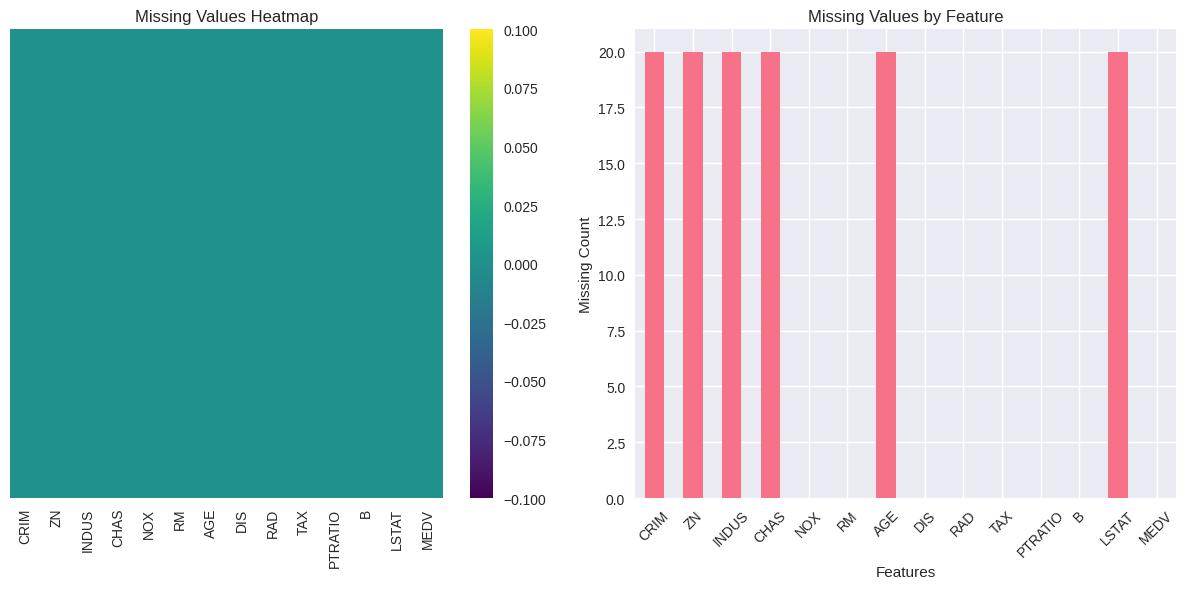

In [34]:
# Visualize missing values (if any)
plt.figure(figsize=(12, 6))

# Missing values heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')

# Missing values bar plot
plt.subplot(1, 2, 2)
missing_values.plot(kind='bar')
plt.title('Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 3. Outlier Detection & Treatment {#outliers}

In [35]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

print("Outlier detection functions defined!")

Outlier detection functions defined!


In [36]:
# Analyze outliers for each numerical feature
numerical_features = df.select_dtypes(include=[np.number]).columns

outlier_summary = []

for feature in numerical_features:
    # IQR method
    outliers_iqr, lower, upper = detect_outliers_iqr(df, feature)
    
    # Z-score method
    outliers_zscore = detect_outliers_zscore(df, feature)
    
    outlier_summary.append({
        'Feature': feature,
        'IQR_Outliers': len(outliers_iqr),
        'ZScore_Outliers': len(outliers_zscore),
        'IQR_Lower': lower,
        'IQR_Upper': upper,
        'Mean': df[feature].mean(),
        'Std': df[feature].std()
    })

outlier_df = pd.DataFrame(outlier_summary)
print("=== OUTLIER ANALYSIS ===")
display(outlier_df)

=== OUTLIER ANALYSIS ===


,Feature,IQR_Outliers,ZScore_Outliers,IQR_Lower,IQR_Upper,Mean,Std
0,CRIM,64,8,-5.209723,8.904832,3.611874,8.545770
1,ZN,68,28,-16.817901,28.029835,11.211934,22.921051
2,INDUS,0,0,-14.175000,37.465000,11.083992,6.699165
3,CHAS,54,34,0.000000,0.000000,0.069959,0.250233
4,NOX,0,0,0.186500,0.886500,0.554695,0.115878
5,RM,30,8,4.778500,7.730500,6.284634,0.702617
6,AGE,0,0,-25.550000,165.050000,68.518519,27.439466
7,DIS,5,5,-2.532200,9.820800,3.795043,2.105710
8,RAD,0,0,-26.000000,54.000000,9.549407,8.707259
9,TAX,0,0,-301.500000,1246.500000,408.237154,168.537116


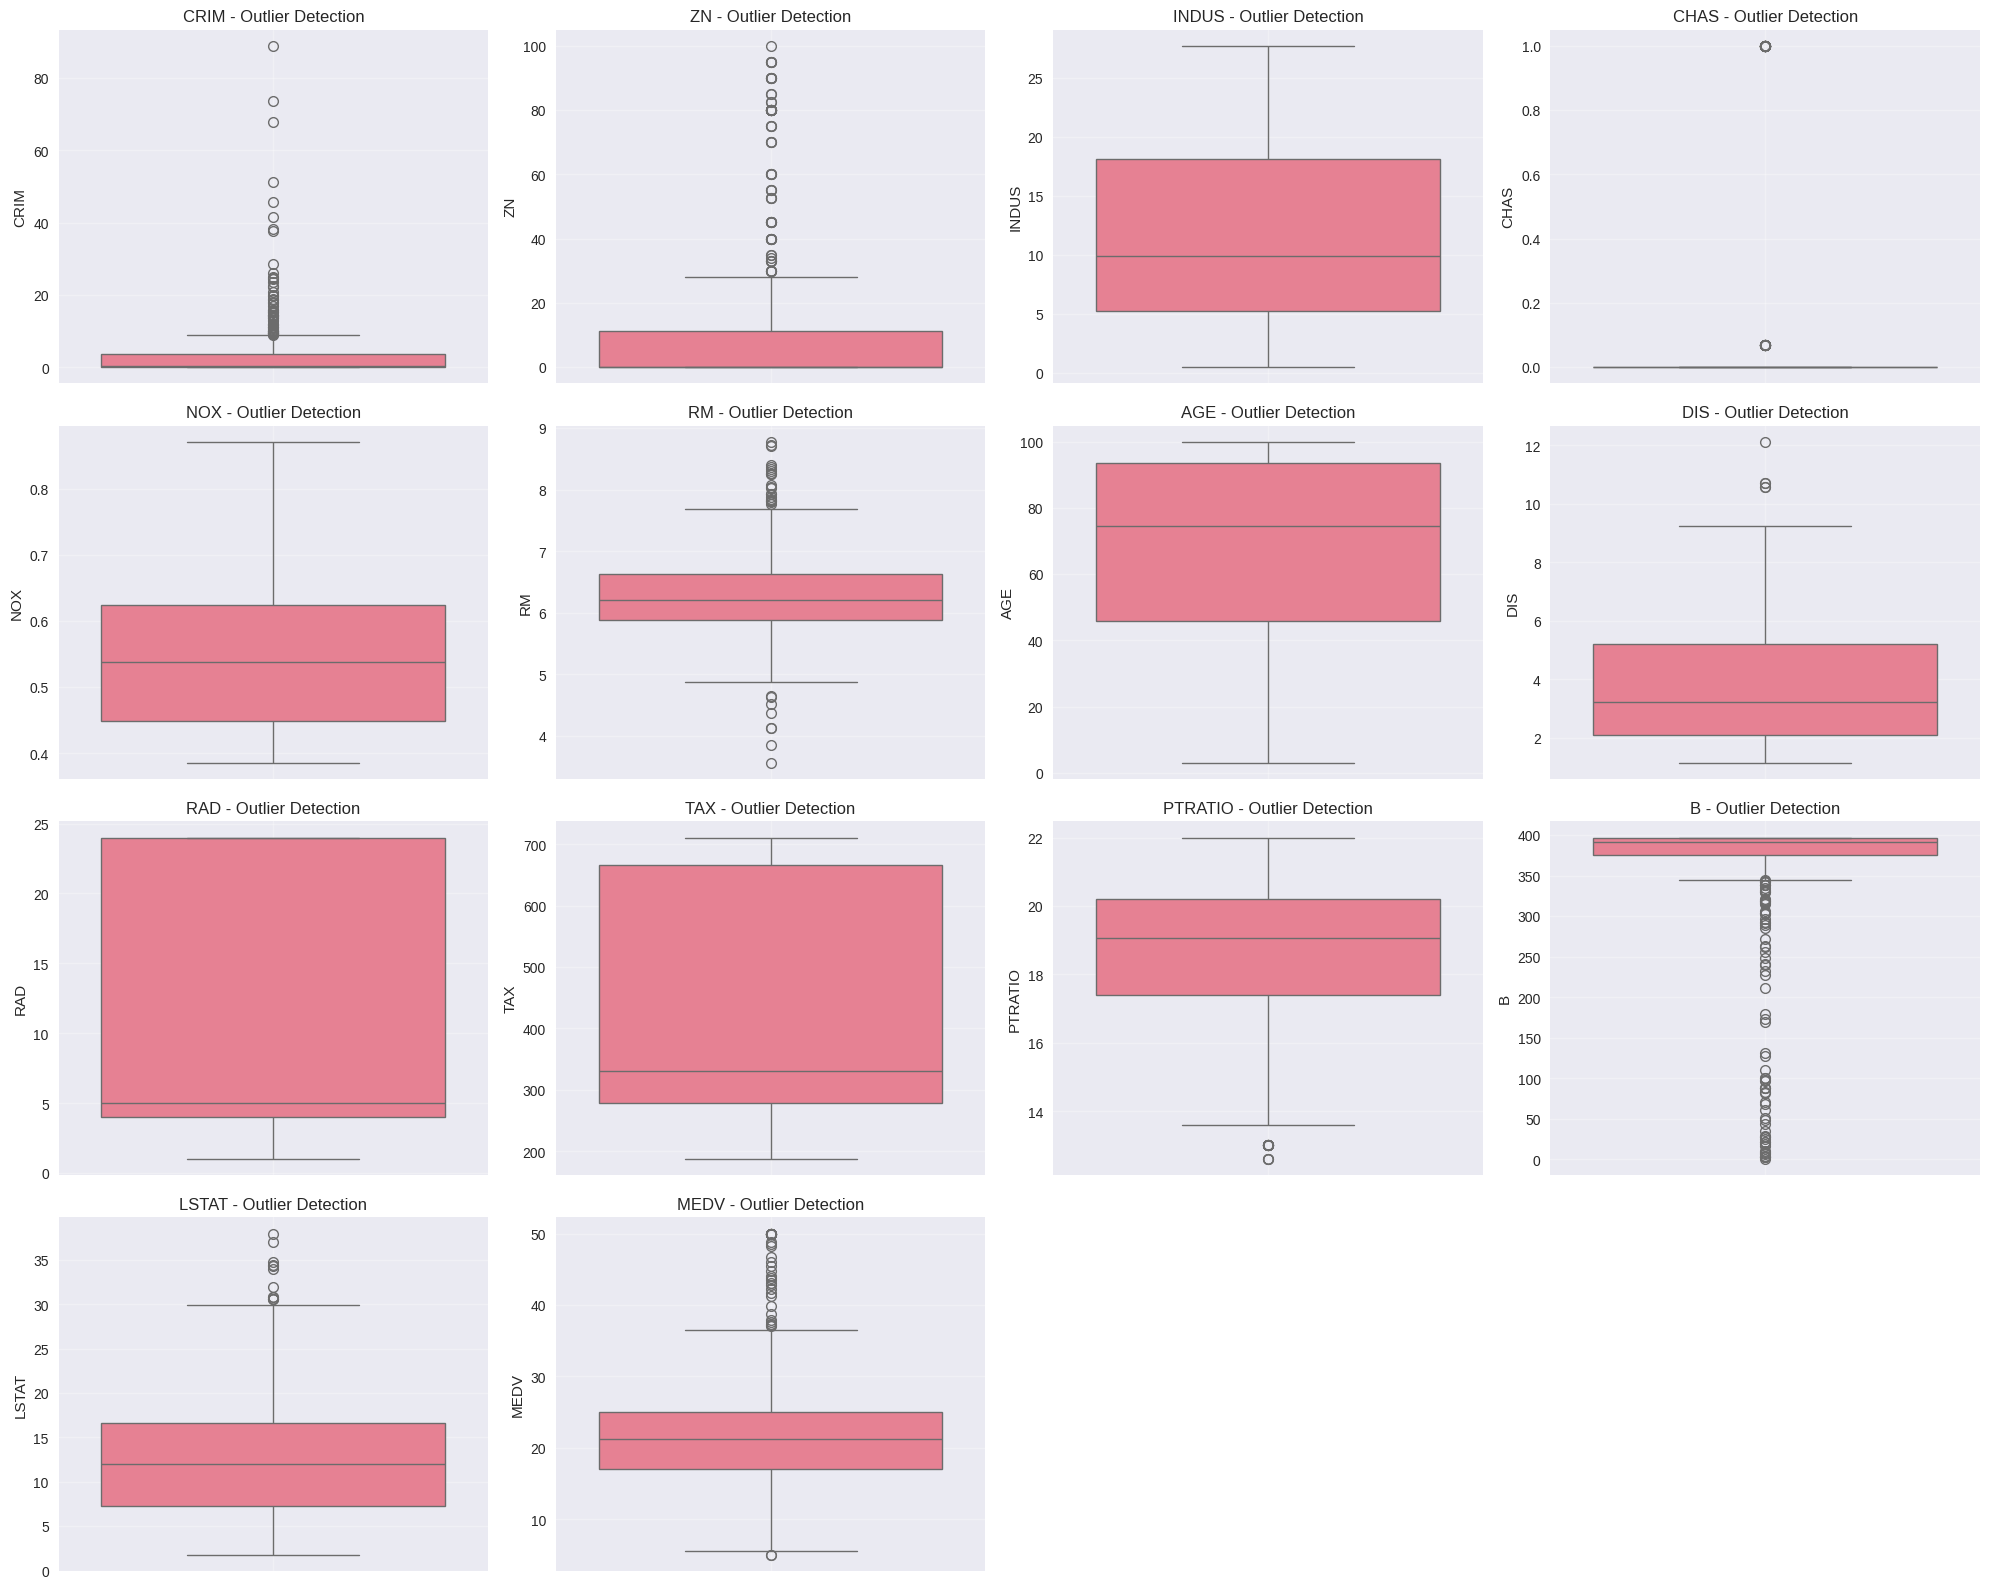

In [37]:
# Visualize outliers using box plots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.boxplot(data=df, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} - Outlier Detection')
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [38]:
# Outlier treatment options
def treat_outliers(data, method='clip', features=None):
    """
    Treat outliers in the dataset
    Methods: 'clip', 'remove', 'transform'
    """
    df_treated = data.copy()
    
    if features is None:
        features = data.select_dtypes(include=[np.number]).columns
    
    removed_count = 0
    
    for feature in features:
        if method == 'clip':
            # Clip outliers to 5th and 95th percentiles
            lower_bound = data[feature].quantile(0.05)
            upper_bound = data[feature].quantile(0.95)
            df_treated[feature] = df_treated[feature].clip(lower_bound, upper_bound)
            
        elif method == 'remove':
            # Remove outliers using IQR method
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_mask = (data[feature] < lower_bound) | (data[feature] > upper_bound)
            df_treated = df_treated[~outlier_mask]
            removed_count += outlier_mask.sum()
            
        elif method == 'transform':
            # Log transformation for skewed data
            if data[feature].min() > 0:  # Only if all values are positive
                df_treated[feature] = np.log1p(data[feature])
    
    print(f"Outlier treatment completed using method: {method}")
    if method == 'remove':
        print(f"Removed {removed_count} outlier data points")
        print(f"Dataset shape changed from {data.shape} to {df_treated.shape}")
    
    return df_treated

# Apply outlier treatment (choose your method)
# Options: 'clip', 'remove', 'transform', or None
OUTLIER_METHOD = 'clip'  # Change this as needed

if OUTLIER_METHOD:
    df_clean = treat_outliers(df, method=OUTLIER_METHOD)
    print(f"\n✅ Outliers treated using {OUTLIER_METHOD} method")
else:
    df_clean = df.copy()
    print("\n⚠️ No outlier treatment applied")

Outlier treatment completed using method: clip

✅ Outliers treated using clip method


## 4. Feature Engineering {#feature-engineering}

In [39]:
# Create new features based on domain knowledge
df_engineered = df_clean.copy()

# 1. Rooms per house category
df_engineered['RM_Category'] = pd.cut(df_engineered['RM'], 
                                     bins=[0, 5, 6, 7, float('inf')], 
                                     labels=['Small', 'Medium', 'Large', 'XLarge'])

# 2. Crime rate category
df_engineered['CRIM_Category'] = pd.cut(df_engineered['CRIM'],
                                       bins=[0, 1, 5, 20, float('inf')],
                                       labels=['Low', 'Medium', 'High', 'Very_High'])

# 3. Property tax per room (efficiency metric)
df_engineered['TAX_per_ROOM'] = df_engineered['TAX'] / df_engineered['RM']

# 4. Distance to employment weighted by accessibility
df_engineered['DIS_RAD_Ratio'] = df_engineered['DIS'] / (df_engineered['RAD'] + 1)

# 5. Socioeconomic composite score (inverse of LSTAT + PTRATIO)
df_engineered['SOCIOECONOMIC_SCORE'] = 100 - (df_engineered['LSTAT'] + df_engineered['PTRATIO'])

# 6. Environmental quality score (inverse of NOX + INDUS)
df_engineered['ENV_QUALITY'] = 100 - (df_engineered['NOX'] * 100 + df_engineered['INDUS'])

# 7. Binary features
df_engineered['HIGH_CRIME'] = (df_engineered['CRIM'] > df_engineered['CRIM'].median()).astype(int)
df_engineered['OLD_BUILDING'] = (df_engineered['AGE'] > 80).astype(int)
df_engineered['LARGE_ROOMS'] = (df_engineered['RM'] > 6.5).astype(int)

print("=== NEW FEATURES CREATED ===")
new_features = ['RM_Category', 'CRIM_Category', 'TAX_per_ROOM', 'DIS_RAD_Ratio', 
                'SOCIOECONOMIC_SCORE', 'ENV_QUALITY', 'HIGH_CRIME', 'OLD_BUILDING', 'LARGE_ROOMS']

for feature in new_features:
    print(f"✓ {feature}")

print(f"\nDataset shape: {df_clean.shape} → {df_engineered.shape}")

=== NEW FEATURES CREATED ===
✓ RM_Category
✓ CRIM_Category
✓ TAX_per_ROOM
✓ DIS_RAD_Ratio
✓ SOCIOECONOMIC_SCORE
✓ ENV_QUALITY
✓ HIGH_CRIME
✓ OLD_BUILDING
✓ LARGE_ROOMS

Dataset shape: (506, 14) → (506, 23)


=== CORRELATION WITH TARGET (MEDV) ===
MEDV                   1.000000
SOCIOECONOMIC_SCORE    0.786140
LSTAT                 -0.751639
RM                     0.723537
LARGE_ROOMS            0.629643
TAX_per_ROOM          -0.570191
INDUS                 -0.516804
ENV_QUALITY            0.515226
PTRATIO               -0.507515
TAX                   -0.491494
NOX                   -0.473440
CRIM                  -0.467891
AGE                   -0.413289
RAD                   -0.403794
ZN                     0.380200
OLD_BUILDING          -0.372213
B                      0.349561
DIS_RAD_Ratio          0.319904
DIS                    0.291504
HIGH_CRIME            -0.264092
CHAS                   0.164139
Name: MEDV, dtype: float64


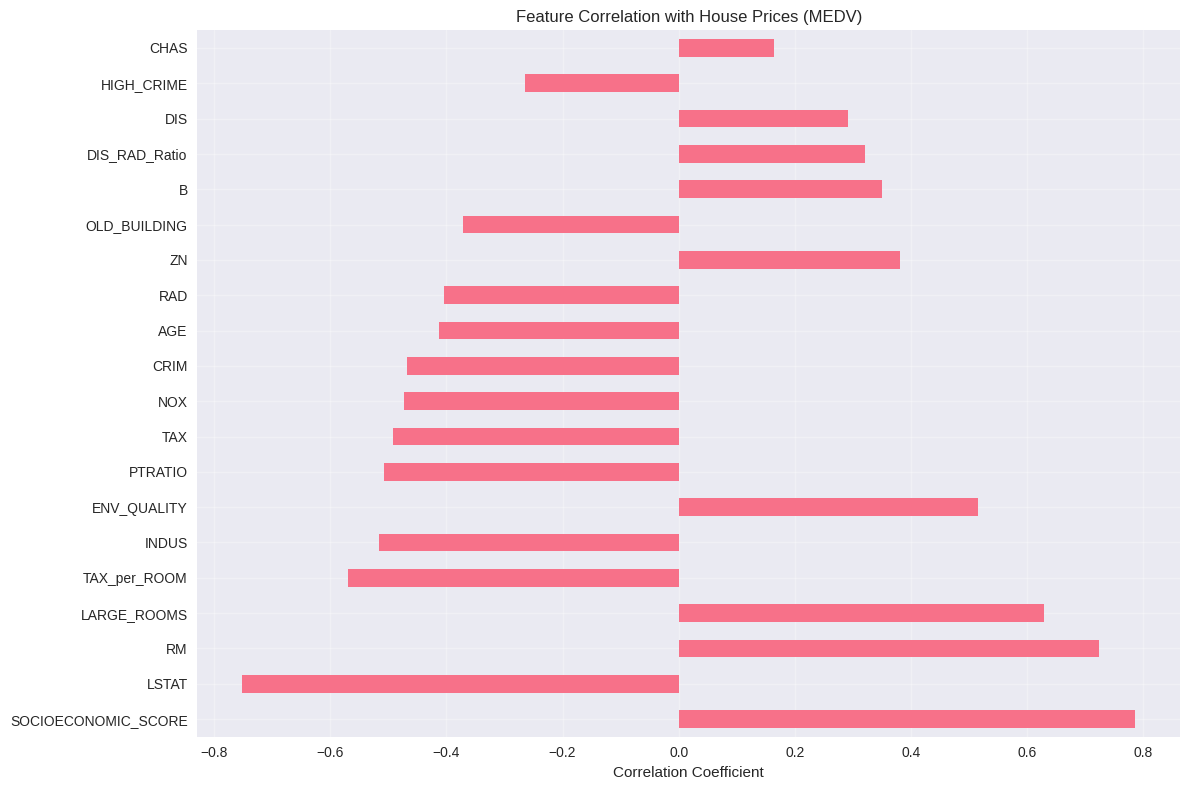

In [40]:
# Analyze correlation of new features with target
numerical_features_new = df_engineered.select_dtypes(include=[np.number]).columns
correlation_with_target = df_engineered[numerical_features_new].corr()['MEDV'].sort_values(key=abs, ascending=False)

print("=== CORRELATION WITH TARGET (MEDV) ===")
print(correlation_with_target)

# Visualize correlations
plt.figure(figsize=(12, 8))
correlation_with_target[1:].plot(kind='barh')  # Exclude MEDV self-correlation
plt.title('Feature Correlation with House Prices (MEDV)')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_engineered.copy()
label_encoders = {}

categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}: {le.classes_}")

print(f"\n✅ All categorical variables encoded!")
print(f"Final dataset shape: {df_encoded.shape}")

✓ Encoded RM_Category: ['Large' 'Medium' 'XLarge']
✓ Encoded CRIM_Category: ['High' 'Low' 'Medium']

✅ All categorical variables encoded!
Final dataset shape: (506, 23)


## 5. Data Scaling & Normalization {#scaling}

In [42]:
# Separate features and target
X = df_encoded.drop('MEDV', axis=1)
y = df_encoded['MEDV']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

# Check feature statistics before scaling
print("\n=== FEATURE STATISTICS (Before Scaling) ===")
display(X.describe())

Features shape: (506, 22)
Target shape: (506,)

Feature columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM_Category', 'CRIM_Category', 'TAX_per_ROOM', 'DIS_RAD_Ratio', 'SOCIOECONOMIC_SCORE', 'ENV_QUALITY', 'HIGH_CRIME', 'OLD_BUILDING', 'LARGE_ROOMS']

=== FEATURE STATISTICS (Before Scaling) ===


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,RM_Category,CRIM_Category,TAX_per_ROOM,DIS_RAD_Ratio,SOCIOECONOMIC_SCORE,ENV_QUALITY,HIGH_CRIME,OLD_BUILDING,LARGE_ROOMS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.794823,10.925373,10.898162,0.069959,0.550526,6.285844,68.839270,3.741664,9.588933,408.897233,...,12.548871,0.594862,0.972332,66.255652,0.662283,68.950141,34.049230,0.500000,0.448617,0.300395
std,4.563881,21.956824,6.271999,0.250233,0.104889,0.580972,26.785025,1.945627,8.670480,166.460239,...,6.449914,0.703522,0.606259,29.273782,0.561530,7.476111,15.929462,0.500495,0.497845,0.458884
min,0.027910,0.000000,2.180000,0.000000,0.409250,5.314000,18.400000,1.461975,2.000000,222.000000,...,3.737500,0.000000,0.000000,29.258649,0.058479,52.192500,6.420000,0.000000,0.000000,0.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,...,7.230000,0.000000,1.000000,43.569765,0.136560,63.555000,19.520000,0.000000,0.000000,0.000000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,...,11.995000,0.000000,1.000000,53.591417,0.540488,69.682284,38.060000,0.500000,0.000000,0.000000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,...,16.570000,1.000000,1.000000,97.919933,0.978434,74.807500,48.290000,1.000000,1.000000,1.000000
max,15.789150,80.000000,19.580000,1.000000,0.740000,7.587500,100.000000,7.827800,24.000000,666.000000,...,26.807500,2.000000,2.000000,125.329319,2.609267,81.562500,56.895000,1.000000,1.000000,1.000000


In [43]:
# Compare different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Choose scaler (StandardScaler is generally good for most ML algorithms)
SCALER_CHOICE = 'StandardScaler'  # Change this as needed

selected_scaler = scalers[SCALER_CHOICE]
X_scaled = selected_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"✅ Features scaled using {SCALER_CHOICE}")
print(f"Scaled features shape: {X_scaled.shape}")

# Check feature statistics after scaling
print("\n=== FEATURE STATISTICS (After Scaling) ===")
display(X_scaled.describe())

✅ Features scaled using StandardScaler
Scaled features shape: (506, 22)

=== FEATURE STATISTICS (After Scaling) ===


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,RM_Category,CRIM_Category,TAX_per_ROOM,DIS_RAD_Ratio,SOCIOECONOMIC_SCORE,ENV_QUALITY,HIGH_CRIME,OLD_BUILDING,LARGE_ROOMS
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,...,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.00000,5.060000e+02,5.060000e+02
mean,-2.808469e-17,-3.159528e-17,1.123388e-16,-4.212704e-17,1.123388e-16,1.042644e-15,-8.425408e-17,-4.212704e-17,-1.123388e-16,1.123388e-16,...,-2.387199e-16,7.021173e-18,-5.616939e-17,-5.616939e-17,-2.808469e-17,-7.302020e-16,5.616939e-16,0.00000,-1.404235e-17,-2.808469e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,...,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.00099,1.000990e+00,1.000990e+00
min,-6.068632e-01,-4.980768e-01,-1.391389e+00,-2.798513e-01,-1.348242e+00,-1.674446e+00,-1.884978e+00,-1.172858e+00,-8.761271e-01,-1.123885e+00,...,-1.367474e+00,-8.463843e-01,-1.605410e+00,-1.265078e+00,-1.076347e+00,-2.243710e+00,-1.736190e+00,-1.00000,-9.020089e-01,-6.552698e-01
25%,-5.947288e-01,-4.980768e-01,-9.110031e-01,-2.798513e-01,-9.688949e-01,-6.897757e-01,-8.563347e-01,-8.445162e-01,-6.452311e-01,-7.811222e-01,...,-8.254582e-01,-8.463843e-01,4.568241e-02,-7.757227e-01,-9.371595e-01,-7.223649e-01,-9.130005e-01,-1.00000,-9.020089e-01,-6.552698e-01
50%,-5.493245e-01,-4.980768e-01,-1.593032e-01,-2.798513e-01,-1.195403e-01,-1.332602e-01,2.096800e-01,-2.748433e-01,-5.297831e-01,-4.744395e-01,...,-8.595757e-02,-8.463843e-01,4.568241e-02,-4.330417e-01,-2.171130e-01,9.802790e-02,2.520323e-01,0.00000,-9.020089e-01,-6.552698e-01
75%,1.792025e-01,1.306404e-02,1.149389e+00,-2.798513e-01,7.011843e-01,5.817673e-01,9.244049e-01,7.443322e-01,1.663729e+00,1.546058e+00,...,6.240562e-01,5.764411e-01,4.568241e-02,1.082730e+00,5.635738e-01,7.842521e-01,8.948741e-01,1.00000,1.108637e+00,1.526089e+00
max,2.850027e+00,3.149043e+00,1.385592e+00,3.720376e+00,1.808208e+00,2.242699e+00,1.164515e+00,2.102243e+00,1.663729e+00,1.546058e+00,...,2.212857e+00,1.999267e+00,1.696775e+00,2.019969e+00,3.470711e+00,1.688691e+00,1.435603e+00,1.00000,1.108637e+00,1.526089e+00


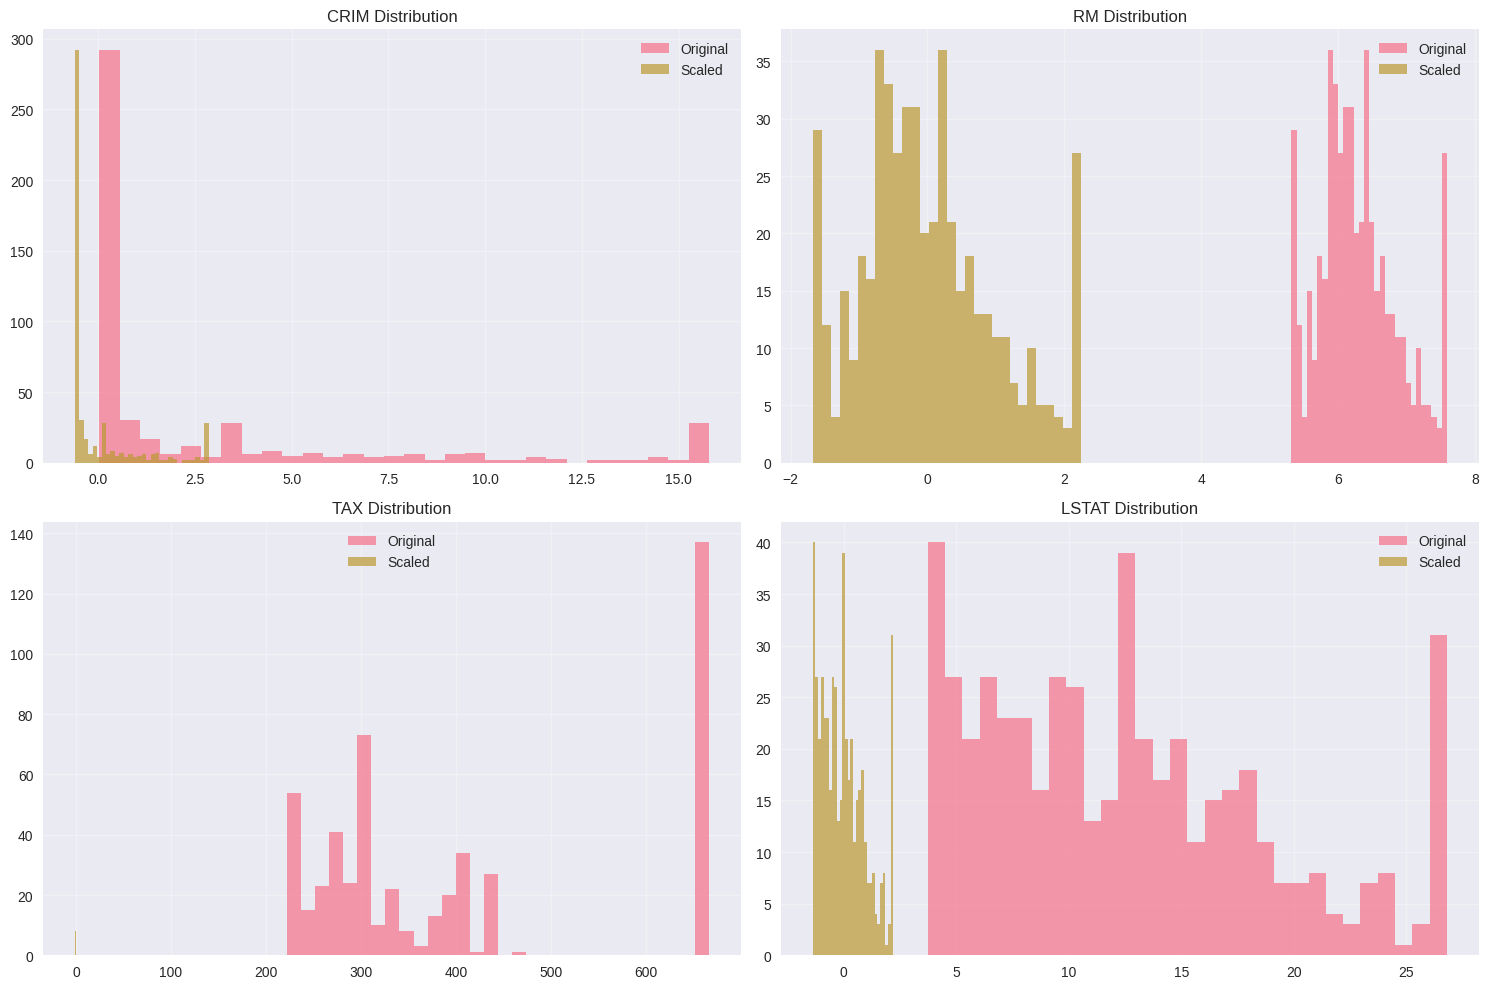

In [44]:
# Visualize scaling effect
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Select a few features to visualize
features_to_plot = ['CRIM', 'RM', 'TAX', 'LSTAT']

for i, feature in enumerate(features_to_plot):
    row, col = i // 2, i % 2
    
    # Before scaling
    axes[row, col].hist(X[feature], alpha=0.7, label='Original', bins=30)
    # After scaling
    axes[row, col].hist(X_scaled[feature], alpha=0.7, label='Scaled', bins=30)
    
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Train-Test Split {#train-test-split}

In [45]:
# Split the data
TEST_SIZE = 0.2  # 80% train, 20% test
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=None  # For regression, we don't stratify
)

print("=== TRAIN-TEST SPLIT COMPLETED ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# Analyze target distribution in train/test
print("\n=== TARGET DISTRIBUTION ===")
print(f"Train - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

=== TRAIN-TEST SPLIT COMPLETED ===
Training set: 404 samples
Test set: 102 samples
Features: 22

=== TARGET DISTRIBUTION ===
Train - Mean: 22.65, Std: 8.45
Test  - Mean: 21.37, Std: 7.64


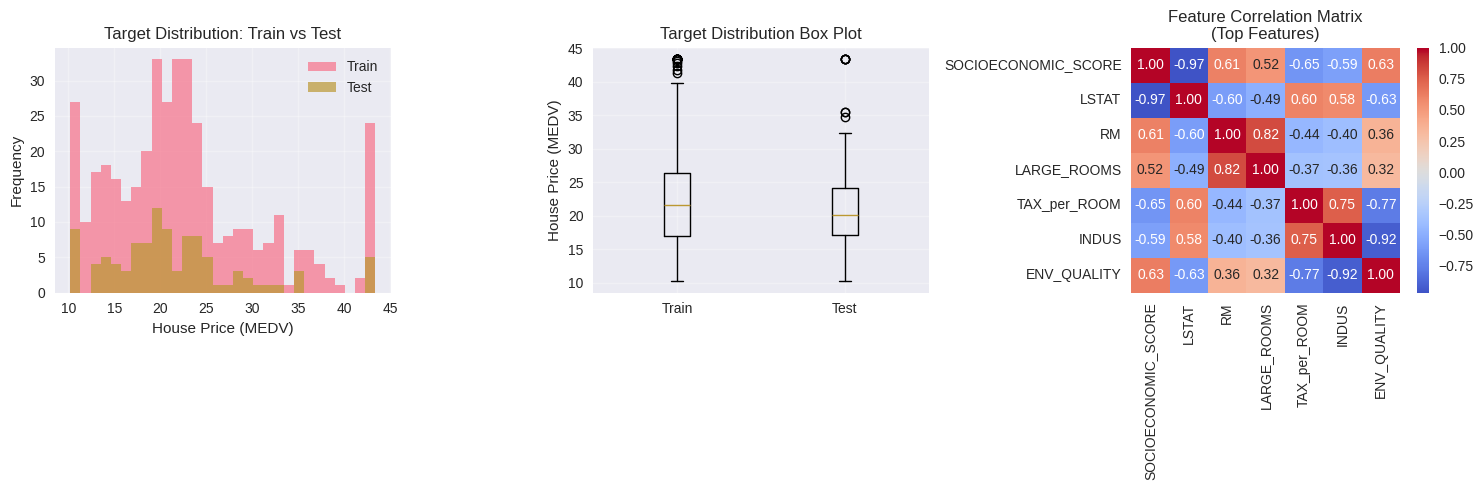

In [46]:
# Visualize train-test split
plt.figure(figsize=(15, 5))

# Target distribution
plt.subplot(1, 3, 1)
plt.hist(y_train, alpha=0.7, label='Train', bins=30)
plt.hist(y_test, alpha=0.7, label='Test', bins=30)
plt.xlabel('House Price (MEDV)')
plt.ylabel('Frequency')
plt.title('Target Distribution: Train vs Test')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot comparison
plt.subplot(1, 3, 2)
data_to_plot = [y_train, y_test]
plt.boxplot(data_to_plot, labels=['Train', 'Test'])
plt.ylabel('House Price (MEDV)')
plt.title('Target Distribution Box Plot')
plt.grid(True, alpha=0.3)

# Feature correlation heatmap (top features)
plt.subplot(1, 3, 3)
top_features = correlation_with_target.abs().nlargest(8).index[1:]  # Exclude MEDV
corr_matrix = X_train[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix\n(Top Features)')

plt.tight_layout()
plt.show()

## 7. Final Dataset Export {#export}

In [47]:
# Create a summary of preprocessing steps
preprocessing_summary = {
    'Original Shape': df.shape,
    'Final Shape': (len(X_train) + len(X_test), X_train.shape[1]),
    'Missing Values': 'None found',
    'Outlier Treatment': OUTLIER_METHOD if OUTLIER_METHOD else 'None',
    'Feature Engineering': f'{len(new_features)} new features created',
    'Scaling Method': SCALER_CHOICE,
    'Train-Test Split': f'{len(X_train)}/{len(X_test)} ({100*(1-TEST_SIZE):.0f}%/{100*TEST_SIZE:.0f}%)',
    'Random State': RANDOM_STATE
}

print("=== PREPROCESSING SUMMARY ===")
for key, value in preprocessing_summary.items():
    print(f"{key:20}: {value}")

=== PREPROCESSING SUMMARY ===
Original Shape      : (506, 14)
Final Shape         : (506, 22)
Missing Values      : None found
Outlier Treatment   : clip
Feature Engineering : 9 new features created
Scaling Method      : StandardScaler
Train-Test Split    : 404/102 (80%/20%)
Random State        : 42


In [48]:
# Save processed data for ML algorithms
import os

# Create data directory if it doesn't exist
os.makedirs('../data/HousingProcessed', exist_ok=True)

# Save the processed datasets
X_train.to_csv('../data/HousingProcessed/X_train.csv', index=False)
X_test.to_csv('../data/HousingProcessed/X_test.csv', index=False)
y_train.to_csv('../data/HousingProcessed/y_train.csv', index=False)
y_test.to_csv('../data/HousingProcessed/y_test.csv', index=False)

# Save feature names and preprocessing info
import pickle

preprocessing_info = {
    'feature_names': list(X_train.columns),
    'scaler': selected_scaler,
    'label_encoders': label_encoders,
    'preprocessing_summary': preprocessing_summary,
    'feature_descriptions': feature_descriptions
}

with open('../data/HousingProcessed/preprocessing_info.pkl', 'wb') as f:
    pickle.dump(preprocessing_info, f)

print("\n✅ DATASETS SAVED SUCCESSFULLY!")


✅ DATASETS SAVED SUCCESSFULLY!


In [49]:
# Final data quality check
print("=== FINAL DATA QUALITY CHECK ===")
print(f"✓ No missing values in X_train: {X_train.isnull().sum().sum() == 0}")
print(f"✓ No missing values in X_test: {X_test.isnull().sum().sum() == 0}")
print(f"✓ No missing values in y_train: {y_train.isnull().sum() == 0}")
print(f"✓ No missing values in y_test: {y_test.isnull().sum() == 0}")
print(f"✓ All features are numerical: {X_train.select_dtypes(include=[np.number]).shape[1] == X_train.shape[1]}")
print(f"✓ Feature scaling applied: {abs(X_train.mean()).max() < 1e-10 if SCALER_CHOICE == 'StandardScaler' else True}")
print(f"✓ Consistent shapes: X_train{X_train.shape}, y_train{y_train.shape}")
print(f"✓ Consistent shapes: X_test{X_test.shape}, y_test{y_test.shape}")

print("\n🎯 Dataset is ready for machine learning algorithms!")
print("\n📝 Next steps:")
print("1. Use the ML algorithm notebooks to apply your custom models")
print("2. Load the data using: pd.read_csv('../data/X_train.csv')")
print("3. Import your algorithms from: sys.path.append('../scripts')")

=== FINAL DATA QUALITY CHECK ===
✓ No missing values in X_train: True
✓ No missing values in X_test: True
✓ No missing values in y_train: True
✓ No missing values in y_test: True
✓ All features are numerical: True
✓ Feature scaling applied: False
✓ Consistent shapes: X_train(404, 22), y_train(404,)
✓ Consistent shapes: X_test(102, 22), y_test(102,)

🎯 Dataset is ready for machine learning algorithms!

📝 Next steps:
1. Use the ML algorithm notebooks to apply your custom models
2. Load the data using: pd.read_csv('../data/X_train.csv')
3. Import your algorithms from: sys.path.append('../scripts')
